In [1]:
#imports
import pandas as pd
from datetime import datetime, timedelta
import os
import matplotlib.pyplot as plt
import seaborn as sns

# constants
raw_dir = "/content/drive/MyDrive/Leren en Beslissen/data lagersmit/raw data"
unsplit_dir = "/content/drive/MyDrive/Leren en Beslissen/data lagersmit/processed data/unsplit"
split_dir = "/content/drive/MyDrive/Leren en Beslissen/data lagersmit/processed data/split"
sampled_dir = "/content/drive/MyDrive/Leren en Beslissen/data lagersmit/processed data/sampled"
normalized_dir = "/content/drive/MyDrive/Leren en Beslissen/data lagersmit/processed data/normalized"
normalization_file = "/content/drive/MyDrive/Leren en Beslissen/data lagersmit/processed data/normalization.csv"

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<Figure size 432x288 with 0 Axes>

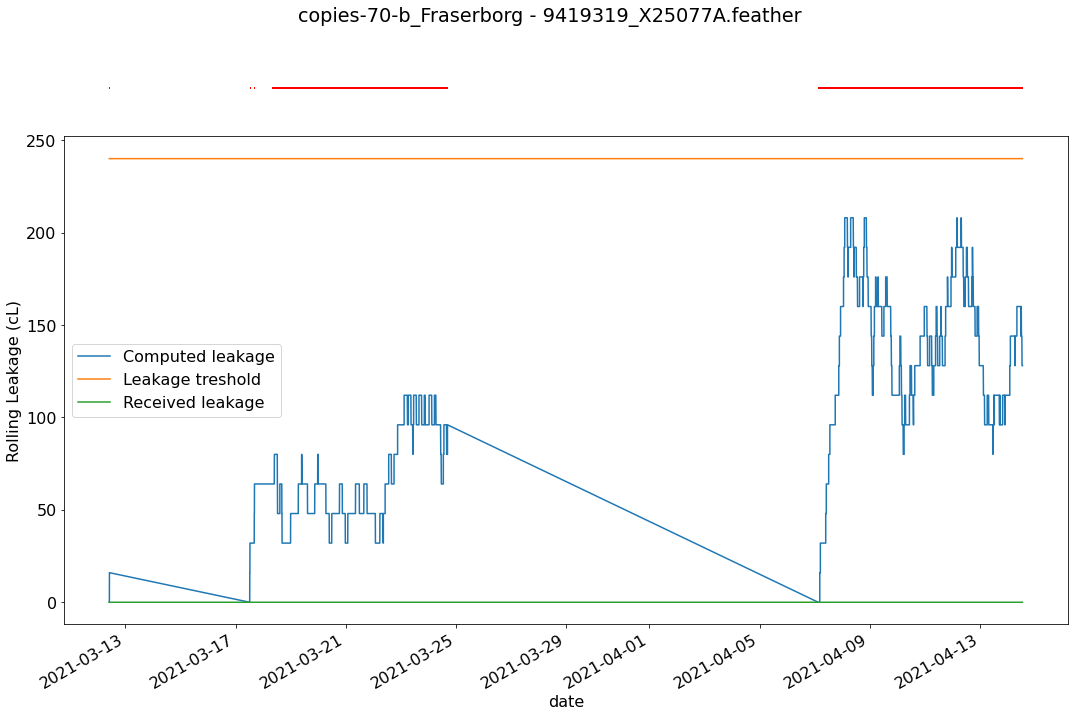

<Figure size 432x288 with 0 Axes>

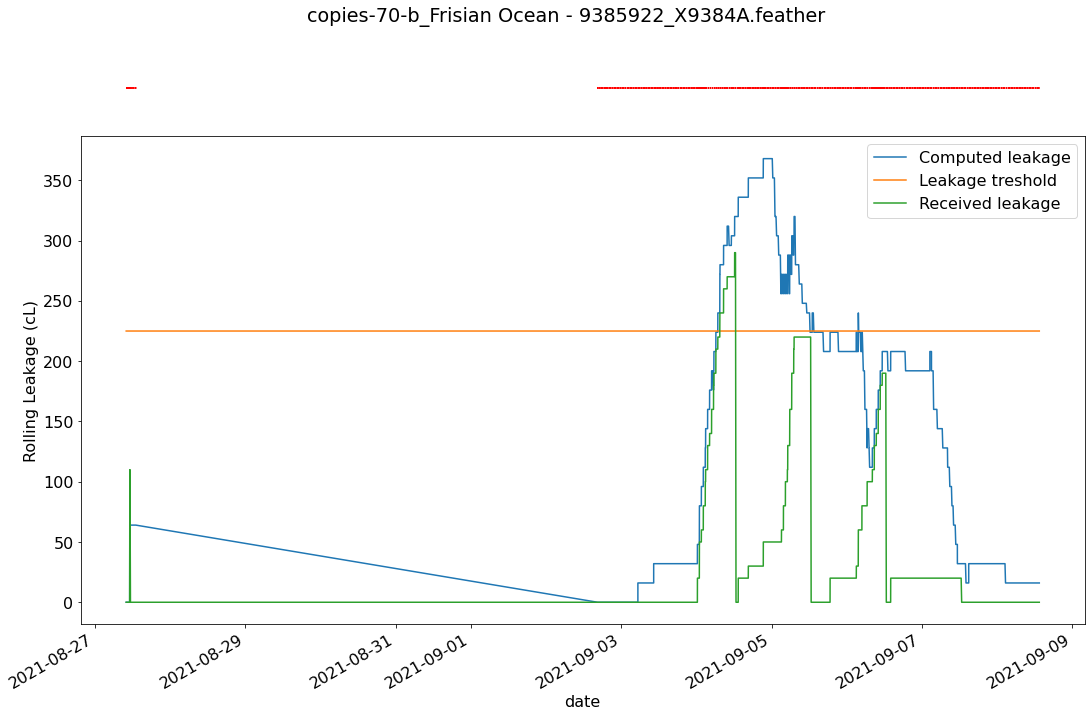

<Figure size 432x288 with 0 Axes>

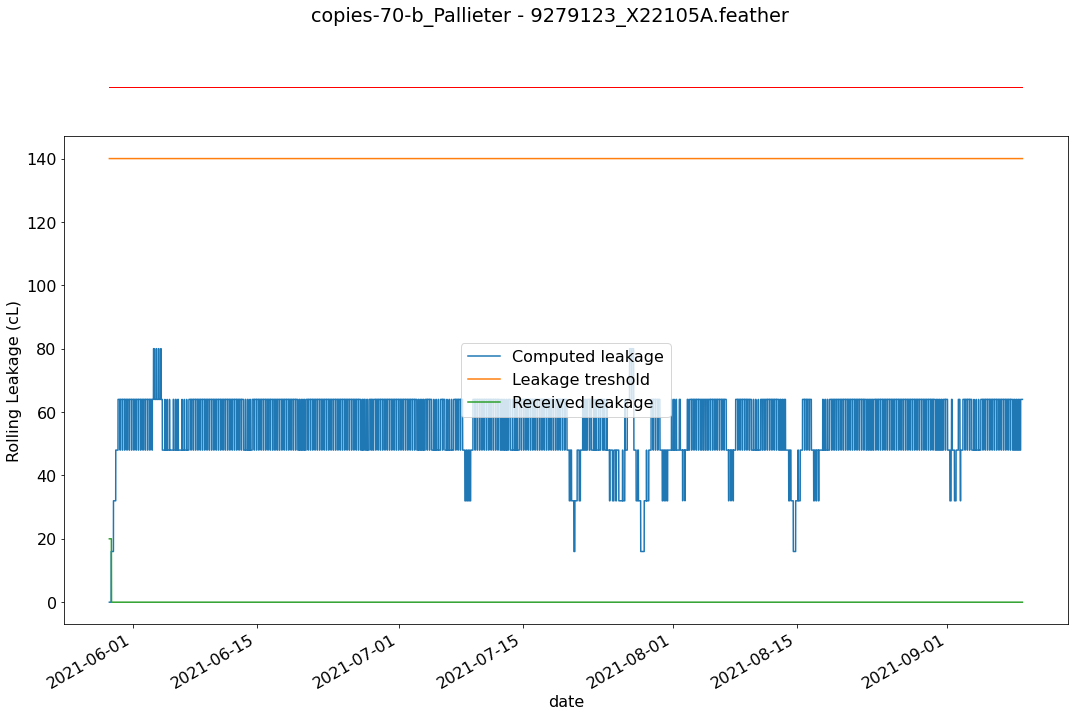

<Figure size 432x288 with 0 Axes>

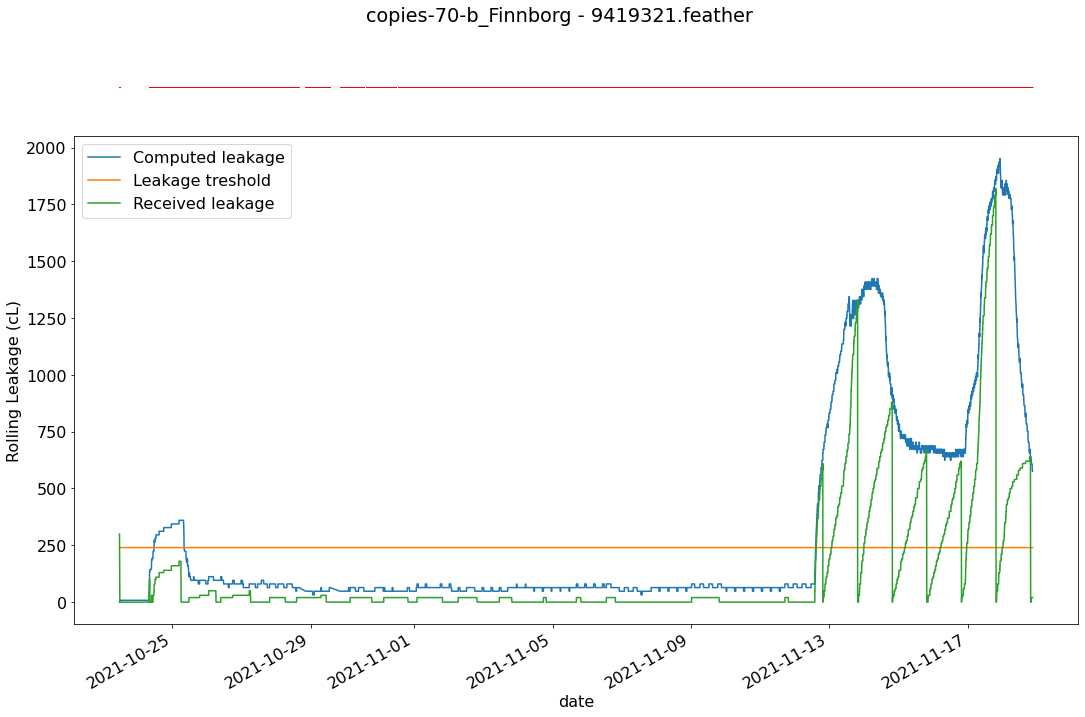

<Figure size 432x288 with 0 Axes>

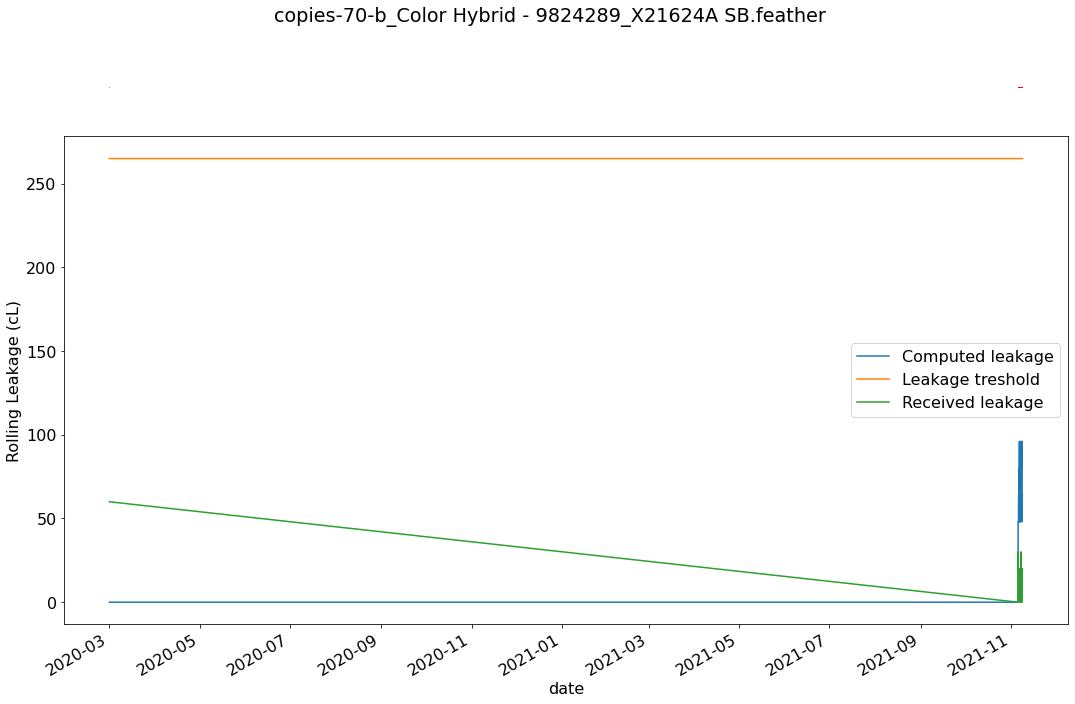

<Figure size 432x288 with 0 Axes>

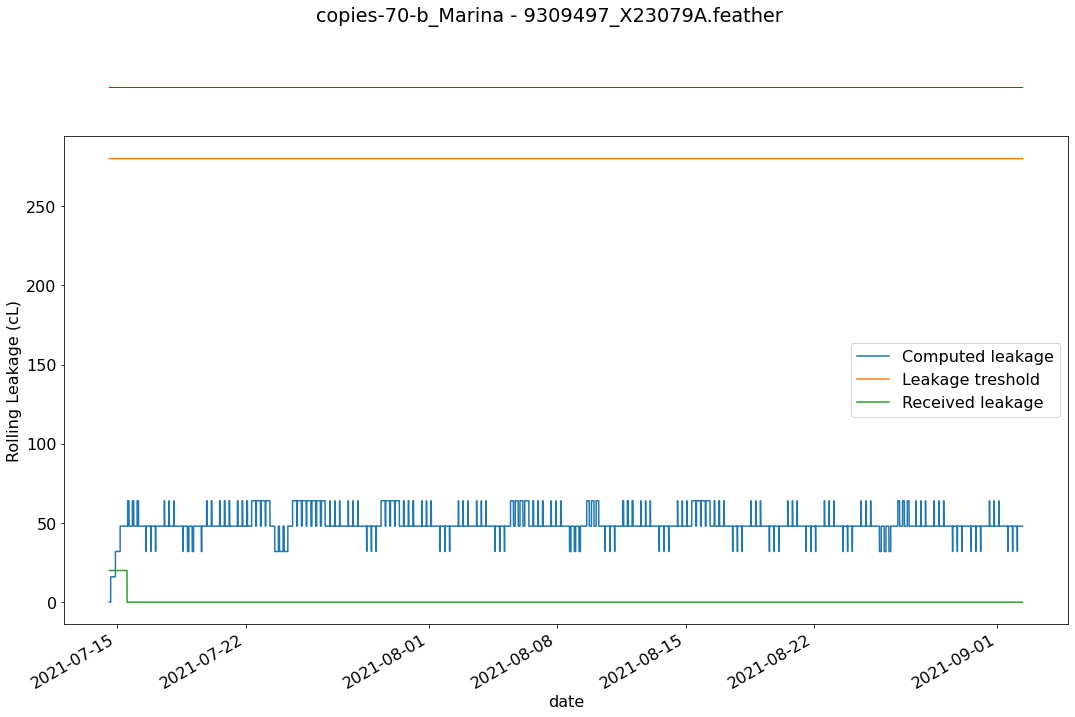

<Figure size 432x288 with 0 Axes>

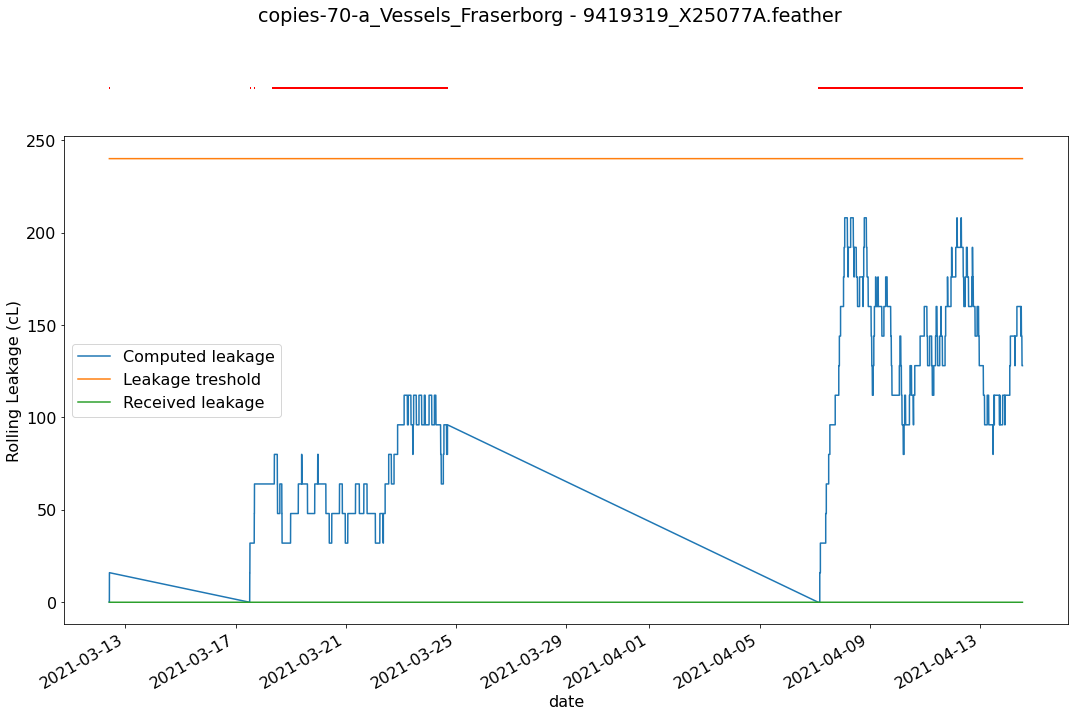

<Figure size 432x288 with 0 Axes>

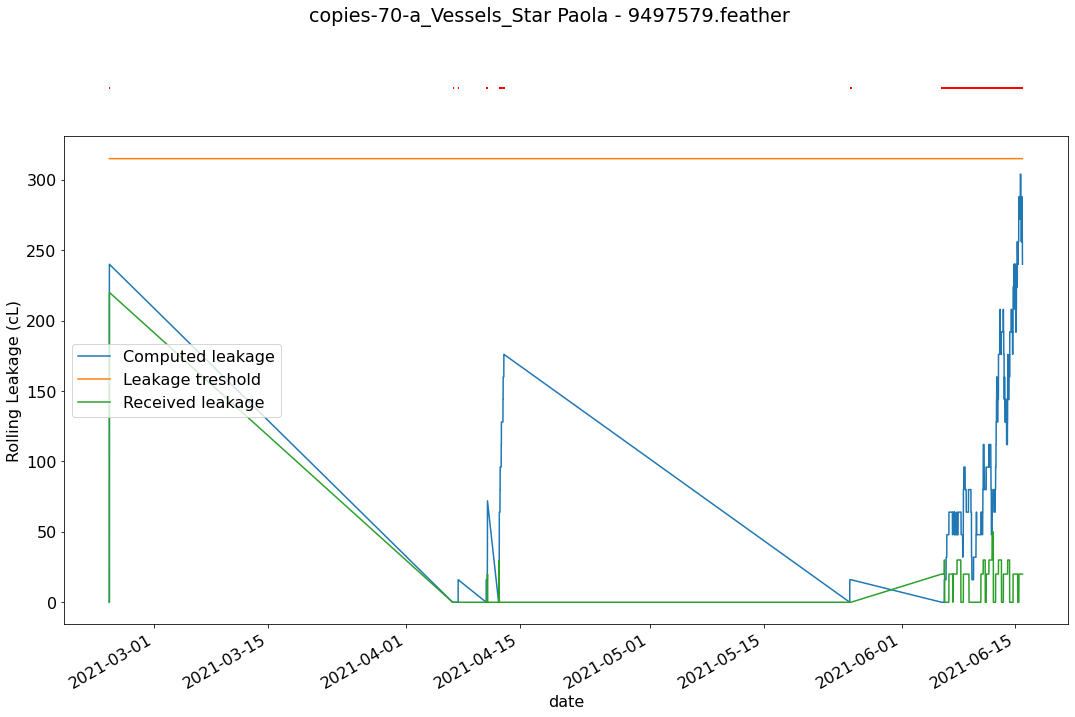

<Figure size 432x288 with 0 Axes>

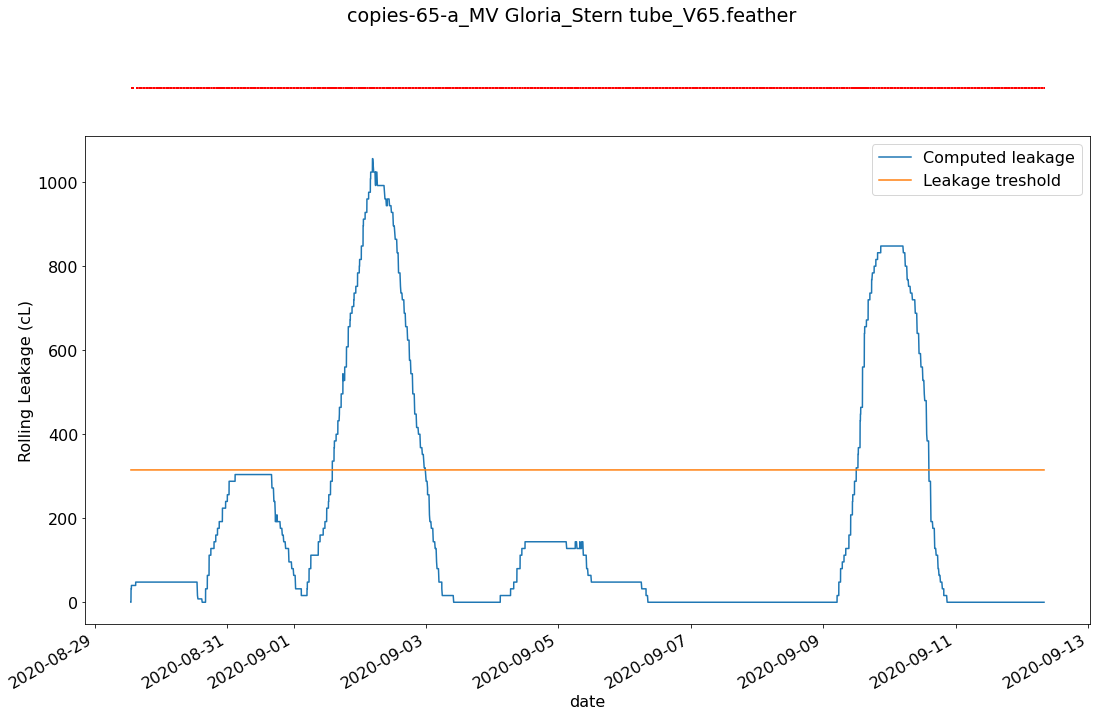

<Figure size 432x288 with 0 Axes>

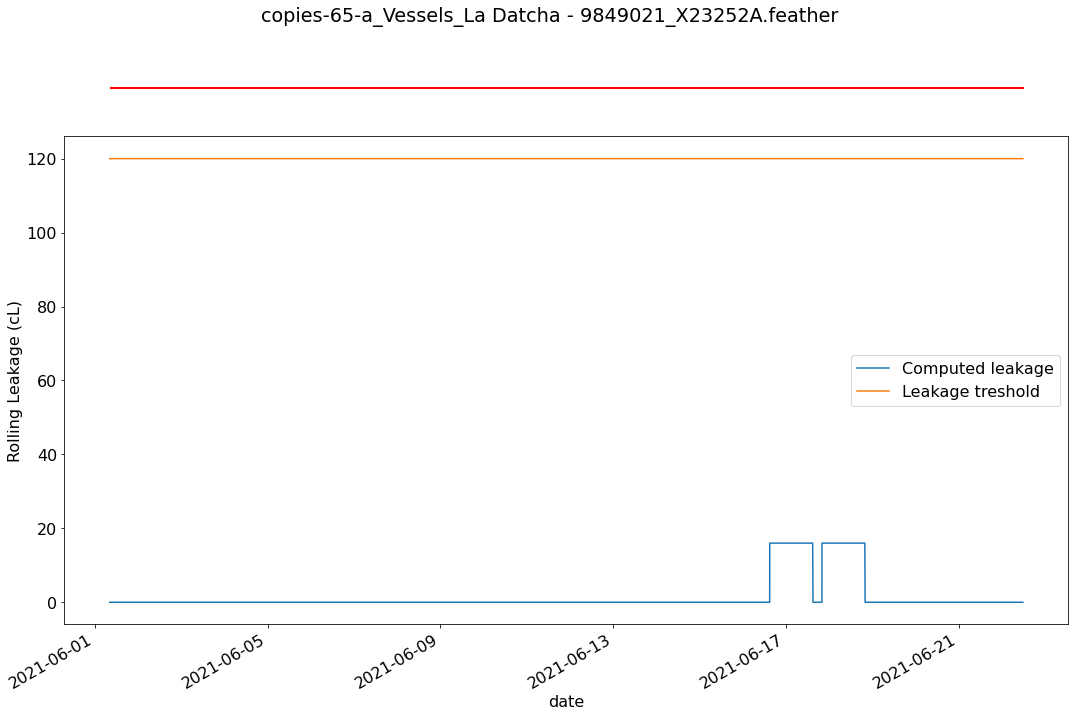

<Figure size 432x288 with 0 Axes>

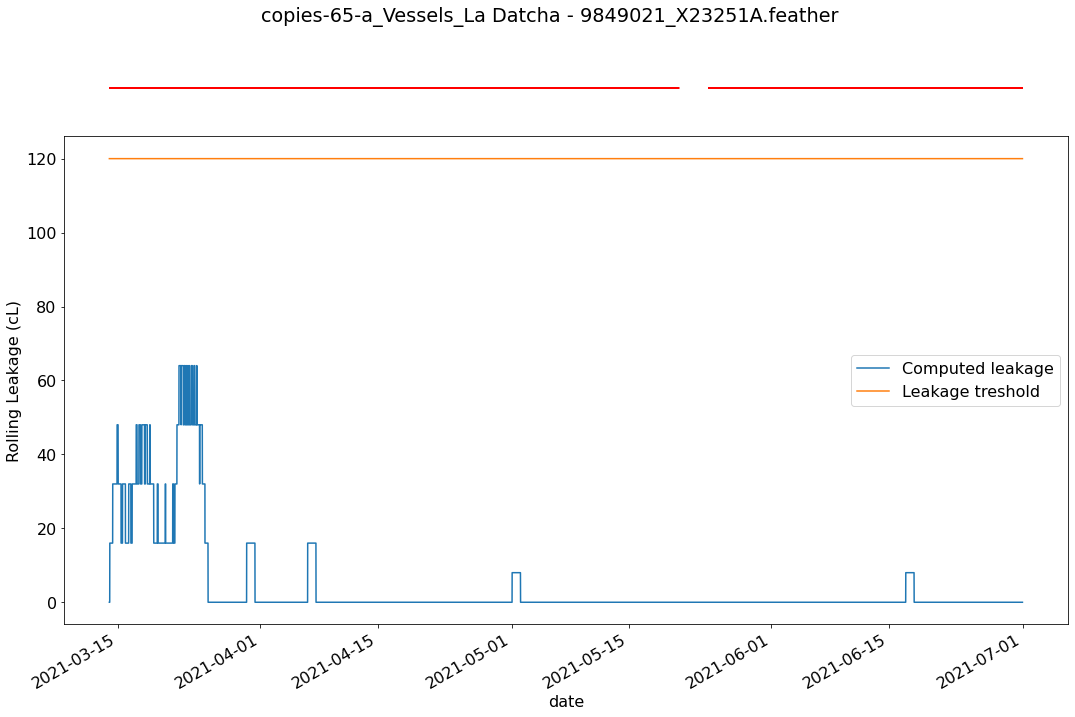

<Figure size 432x288 with 0 Axes>

KeyboardInterrupt: ignored

In [20]:
source_dir = unsplit_dir


def display_boat_data(name, data):
  plt.figure()

  plt.rcParams.update({'font.size': 16})

  fig, (ax1, ax2) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [1, 300]}, figsize=(18, 11))
  fig.suptitle(name)


  ax1.plot(data['Time'], [0] * len(data.index), 'r|', markersize=1)
  ax1.set_axis_off()

  ax2.set_ylabel('Rolling Leakage (cL)')
  ax2.plot(data['Time'], data['averageLeakageRolling'], label="Computed leakage")
  ax2.plot(data['Time'], data['allowedLeakage'], label = "Leakage treshold")
  if 'B069.AQ' in data:
    ax2.plot(data['Time'], data['B069.AQ'] * 10, label="Received leakage")
  # if 'B069.AQ' in data:
  #   ax2.plot(data['Time'], data['B069.AQ']*10)
  
  # ax3.set_ylabel('Cumulative Leakage (cL)')
  # ax3.plot(data['Time'], data['maxLeakageCum'])
  # ax3.plot(data['Time'], data['minLeakageCum'])
  # ax3.plot(data['Time'], data['averageLeakageCum'])

  ax2.set_xlabel('date')
  plt.gcf().autofmt_xdate()

  plt.legend()

  plt.show()

for subdir, dirs, files in os.walk(source_dir):
  for file in files:
    if os.path.splitext(file)[1] == '.feather':
      filepath = os.path.join(subdir, file)

      data = pd.read_feather(filepath)
      display_boat_data(file, data)



In [ ]:
def display_boat_data_raw(name, data):
  plt.figure()

  fig, (ax1, ax2, ax3) = plt.subplots(3, 1, gridspec_kw={'height_ratios': [1, 8, 8]}, figsize=(18, 11))
  fig.suptitle(name)

  ax1.plot(data['Time'], [0] * len(data.index), 'r|', markersize=1)
  ax1.set_axis_off()

  ax2.set_ylabel('Rolling Leakage (cL)')

  # if 'B069.AQ' in data:
  #   ax2.plot(data['Time'], data['B069.AQ']*10)
  
  ax3.set_ylabel('Cumulative Leakage (cL)')
  ax3.plot(data['Time'], data['maxLeakageCum'])
  ax3.plot(data['Time'], data['minLeakageCum'])
  ax3.plot(data['Time'], data['averageLeakageCum'])

  ax3.set_xlabel('date')
  plt.gcf().autofmt_xdate()

  plt.show()

for subdir, dirs, files in os.walk(raw_dir):
  for file in files:
    if os.path.splitext(file)[1] == '.csv':
      filepath = os.path.join(subdir, file)

      data = pd.read_csv(filepath)
      display_boat_data_raw(file, data)

In [ ]:
for subdir, dirs, files in os.walk(normalized_dir):
  for file in files:
    if os.path.splitext(file)[1] == '.feather':
      filepath = os.path.join(subdir, file)
      data = pd.read_feather(filepath)

      if len(data.index) > 1:
        molten_data = data.melt(var_name='Column', value_name='Normalized')
        plt.figure(figsize=(20, 8))
        plt.title(file)
        ax = sns.violinplot(x='Column', y='Normalized', data=molten_data)
        ax.set_xticklabels(data.keys(), rotation=90)
        plt.show()

In [ ]:
for subdir, dirs, files in os.walk(raw_dir):
  for file in files:
    print(file)
    if os.path.splitext(file)[1] == '.csv':
      filepath = os.path.join(subdir, file)

      data = pd.read_csv(filepath)
      print(data.head())